# 1.1 Importing Main Dependincies

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K

from matplotlib import pyplot as plt
import numpy as np
import os
import cv2
import imghdr

In [ ]:
print("TensorFlow version:", tf.__version__)
print("Working Path Directory:", os.path)

TensorFlow version: 2.11.0
Working Path Directory: <module 'posixpath' from '/usr/lib/python3.8/posixpath.py'>


#1.2 Data Pathways Initialization



In [ ]:
daVinciData = 'daVinci'
daliData = 'dali'
gKData = 'gustavK'
monetData = 'moenet'
picassoData= 'picasso'
rmData = 'reneM'
vgData = 'vanGough'

dataDir = 'data'
img_exts = ['jpeg','jpg','bmp','png']

In [ ]:
os.listdir(dataDir)

['gustavK',
 'reneM',
 'vanGough',
 'dali',
 'daVinci',
 'monet',
 'picasso',
 '.ipynb_checkpoints']

In [ ]:
# for image_class in os.listdir(dataDir):
#   for image in os.listdir(os.path.join(dataDir, image_class)): 
#     print(image)

#1.2.1 Clean and Validate Data

In [ ]:
for image_class in os.listdir(dataDir): 
  for image in os.listdir(os.path.join(dataDir, image_class)):
        imagePath = os.path.join(dataDir, image_class, image)
        try: 
            img = cv2.imread(imagePath)
            tip = imghdr.what(imagePath)
            if tip not in img_exts:
              print("Image not in extension list {}".format(imagePath))
              os.remove(imagePath)
        except Exception as e:
          print('Issue with image {}'.format(imagePath))

Issue with image data/dali/.ipynb_checkpoints


#2.1 Building Data Pipeline

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(dataDir) # standard batch size of 32

Found 1785 files belonging to 8 classes.


In [ ]:
data = data.map(lambda x,y: (x/255, y)) ## scaling the image

In [ ]:
scaled_iterator = data.as_numpy_iterator() #creating a batch iterator

In [ ]:
batch = scaled_iterator.next() # getting next batch of size 32

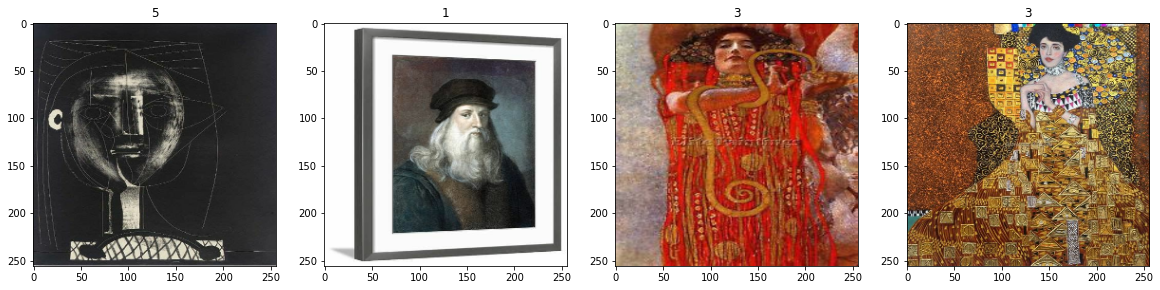

In [ ]:
fix, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(float))
  ax[idx].title.set_text(batch[1][idx])
  #1 - DaVinci
  #2 - Dai
  #3 - Gustav Klimt
  #4 - Monet
  #5 - Picasso
  #6 - Rene Magritte
  #7 - Van Gough


#2.2 Splitting Data

In [ ]:
len(data) # batch size of 56

56

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

print(f"Train: {train_size} - Validation: {val_size} - Test: {test_size}")

Train: 39 - Validation: 11 - Test: 5


In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [6]:
class SmallerVGGNet:
	@staticmethod
	def build(width, height, depth, classes, finalAct="softmax"):
		# initialize the model along with the input shape to be
		# "channels last" and the channels dimension itself
		model = Sequential()
		inputShape = (height, width, depth)
		chanDim = -1
		# if we are using "channels first", update the input shape
		# and channels dimension

		if K.image_data_format() == "channels_first":
			inputShape = (depth, height, width)
			chanDim = 1
      # CONV => RELU => POOL
      model.add(Conv2D(32, (3, 3), padding="same",
        input_shape=inputShape))
      model.add(Activation("relu"))
      model.add(BatchNormalization(axis=chanDim))
      model.add(MaxPooling2D(pool_size=(3, 3)))
      model.add(Dropout(0.25))
      # (CONV => RELU) * 2 => POOL
      model.add(Conv2D(64, (3, 3), padding="same"))
      model.add(Activation("relu"))
      model.add(BatchNormalization(axis=chanDim))
      model.add(Conv2D(64, (3, 3), padding="same"))
      model.add(Activation("relu"))
      model.add(BatchNormalization(axis=chanDim))
      model.add(MaxPooling2D(pool_size=(2, 2)))
      model.add(Dropout(0.25))
      # (CONV => RELU) * 2 => POOL
      model.add(Conv2D(128, (3, 3), padding="same"))
      model.add(Activation("relu"))
      model.add(BatchNormalization(axis=chanDim))
      model.add(Conv2D(128, (3, 3), padding="same"))
      model.add(Activation("relu"))
      model.add(BatchNormalization(axis=chanDim))
      model.add(MaxPooling2D(pool_size=(2, 2)))
      model.add(Dropout(0.25))
      # first (and only) set of FC => RELU layers
      model.add(Flatten())
      model.add(Dense(1024))
      model.add(Activation("relu"))
      model.add(BatchNormalization())
      model.add(Dropout(0.5))
      # softmax classifier
      model.add(Dense(classes))
      model.add(Activation(finalAct))
      # return the constructed network architecture
      return model

IndentationError: ignored

#3.1 Deep Learning Build

In [ ]:
model = Sequential()

In [ ]:
# model.add(Dense(256, activation='softmax'))

model.add(Conv2D(32, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
#MaxPool condesing wach 2x2 patch and taking max value

model.add(Conv2D(16,  (3,3), 1, activation='relu'))
model.add(MaxPooling2D())


model.add(Conv2D(32,  (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(7, activation='softmax'))


In [ ]:
model.compile('adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 16)      4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 62, 62, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 60, 60, 32)        4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 30, 32)      

#3.1 Training Model






In [ ]:
logdir = 'logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


ValueError: ignored

#3.2 History

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

NameError: ignored

<Figure size 432x288 with 0 Axes>